# NN and DL: Exam Assignment - update 23/10

Jens Matthé - jmatthe@edu.hse.ru - 21/01.91/130

In [65]:
#install fastai package with the necessary functions
!conda install fastai==1.0.61

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - fastai==1.0.61

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [69]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [67]:
#ignore the warnings through the code
import warnings
warnings.filterwarnings("ignore")

In [68]:
#data is downloaded via link and saved on my personal computer
import pandas as pd
path_img = "/Users/jens/Downloads/camvid_tiny/images"
path_lab= "/Users/jens/Downloads/camvid_tiny/labels"

## Data

In [5]:
#get images from saved path
fnames = get_image_files(path_img)
#check first three
fnames[:3]

[PosixPath('/Users/jens/Downloads/camvid_tiny/images/0006R0_f02550.png'),
 PosixPath('/Users/jens/Downloads/camvid_tiny/images/0016E5_08137.png'),
 PosixPath('/Users/jens/Downloads/camvid_tiny/images/0001TP_006840.png')]

In [6]:
#get labels from saved path
lbl_names = get_image_files(path_lab)
#check first three
lbl_names[:3]

[PosixPath('/Users/jens/Downloads/camvid_tiny/labels/Seq05VD_f02070_P.png'),
 PosixPath('/Users/jens/Downloads/camvid_tiny/labels/0001TP_009000_P.png'),
 PosixPath('/Users/jens/Downloads/camvid_tiny/labels/Seq05VD_f02640_P.png')]

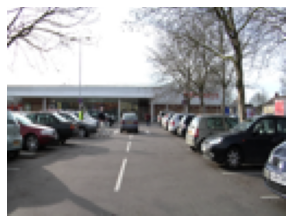

In [7]:
#take and show first image from fnames
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5, 5))

In [8]:
from pathlib import Path

In [9]:
#check img_f to be sure it works
img_f

PosixPath('/Users/jens/Downloads/camvid_tiny/images/0006R0_f02550.png')

In [10]:
#initialise function to concatenate names and match file with name of the label
get_y_fn = lambda input: path_lab +'/'+ f'{input.stem}_P{input.suffix}'

In [11]:
#check again whether function is working
#compared with img_f we see that the lambda function succeeded in pasting the _P
get_y_fn(img_f)

'/Users/jens/Downloads/camvid_tiny/labels/0006R0_f02550_P.png'

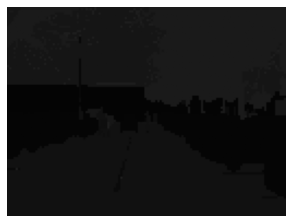

In [12]:
#show image
img = open_image(get_y_fn(img_f))
img.show(figsize=(5,5))

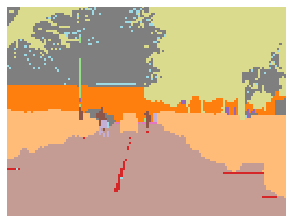

In [13]:
#use mask command since previous image was too dark
#colours are making more sense
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5, 5), alpha=1)

In [14]:
#numpy of data: representing the different pixels who are together with the same number
src_size = np.array(mask.shape[1:])
src_size, mask.data

(array([ 96, 128]),
 tensor([[[21, 21, 21,  ..., 26, 26, 26],
          [21, 21, 21,  ..., 26, 26, 26],
          [21, 26, 26,  ..., 26, 26, 26],
          ...,
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17],
          [17, 17, 17,  ..., 17, 17, 17]]]))

In [15]:
#load the codes from txt file associating with objects and print them
codes = np.loadtxt('/Users/jens/Downloads/camvid_tiny/codes.txt', dtype=str)
print(codes)

['Animal' 'Archway' 'Bicyclist' 'Bridge' 'Building' 'Car' 'CartLuggagePram' 'Child' 'Column_Pole' 'Fence'
 'LaneMkgsDriv' 'LaneMkgsNonDriv' 'Misc_Text' 'MotorcycleScooter' 'OtherMoving' 'ParkingBlock' 'Pedestrian' 'Road'
 'RoadShoulder' 'Sidewalk' 'SignSymbol' 'Sky' 'SUVPickupTruck' 'TrafficCone' 'TrafficLight' 'Train' 'Tree' 'Truck_Bus'
 'Tunnel' 'VegetationMisc' 'Void' 'Wall']


## Datasets

In [16]:
#small size to start with (source devided by 2)
size = src_size//2

#defining optimal batchsize, since I run locally this time it is 4
free = gpu_mem_get_free_no_cache()
if free > 8200: 
  bs=8
else:
  bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")
#no use of gpu

using bs=4, have 0MB of GPU RAM free


In [17]:
#split data for validation randomly and match with codes
src = (SegmentationItemList.from_folder(path_img)
       .split_by_rand_pct(0.2)
       .label_from_func(get_y_fn, classes=codes))

In [18]:
#needed to prevent error in my own terminal
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
#80% data used for training and 20% for validation
print(src)

LabelLists;

Train: LabelList (80 items)
x: SegmentationItemList
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: SegmentationLabelList
ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128)
Path: /Users/jens/Downloads/camvid_tiny/images;

Valid: LabelList (20 items)
x: SegmentationItemList
Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128),Image (3, 96, 128)
y: SegmentationLabelList
ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128),ImageSegment (1, 96, 128)
Path: /Users/jens/Downloads/camvid_tiny/images;

Test: None


In [20]:
#transform data: flip together with labels
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

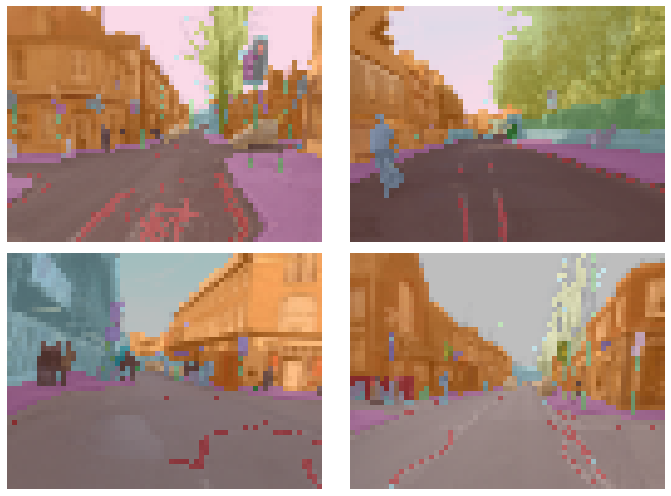

In [21]:
#applied to the trainingset
data.show_batch(2, figsize=(10, 7))

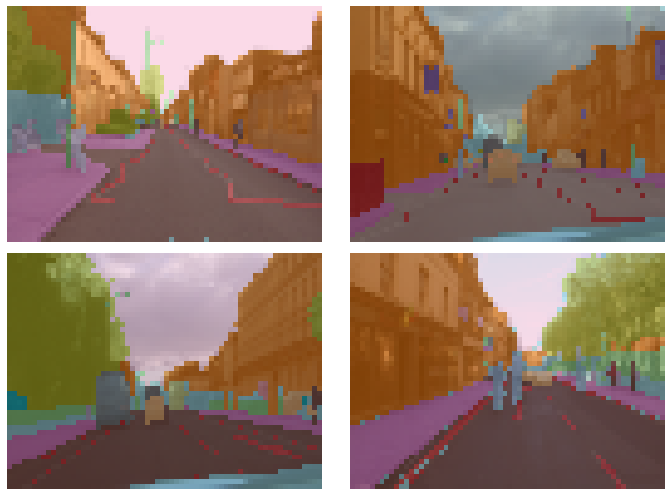

In [22]:
#applied to the validationset
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [23]:
#create accuracy function (match acc with void class)
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [24]:
metrics = acc_camvid

In [25]:
#weight decay set
wd = 1e-2

In [26]:
#unet: encoding (resnet34) and decoding
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [27]:
#find best LR
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


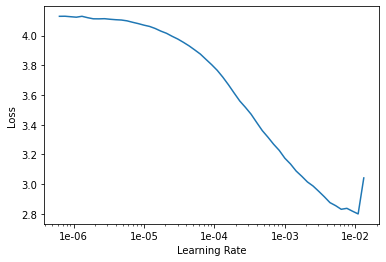

In [28]:
#learning rate plot
learn.recorder.plot()

In [29]:
#LR 1e-3 is close to and before minimum loss
lr = 3e-3

In [30]:
#first 90% increasing learning rate for acc of 80%
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,2.338425,1.615260,0.636389,01:19
1,1.848041,1.257210,0.679137,01:20
2,1.568906,1.128235,0.698053,01:17
3,1.418297,1.083172,0.693815,01:13
4,1.313876,1.048497,0.726175,01:15
5,1.239038,1.007655,0.711017,01:10
6,1.155983,0.948683,0.777133,01:14
7,1.083522,0.888404,0.777849,01:19
8,1.015854,0.881037,0.783654,01:15
9,0.958344,0.810747,0.803304,01:19


In [31]:
#save model 1
learn.save('ExamTask1')

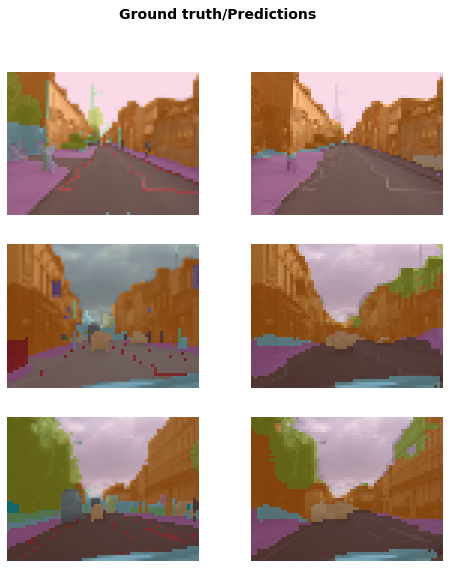

In [32]:
learn.show_results(rows=3, figsize=(8, 9))

Most of the streets, houses and cars are detected but not pedestrians and cycling people. There is also confusion between the buildings and trees.

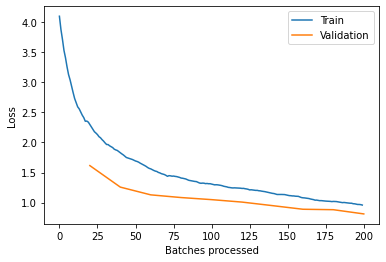

In [33]:
#model already ok
learn.recorder.plot_losses()

In [34]:
#improving by unfreezing encoder for training it
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


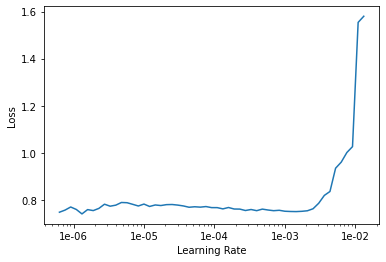

In [36]:
learn.recorder.plot()

In [37]:
#learning till 81.4%
#optimal LR stays 1e-03
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.729186,0.779132,0.818129,01:17
1,0.710587,0.770433,0.823893,01:22
2,0.710875,0.784390,0.811257,01:16
3,0.706129,0.803397,0.819876,01:11
4,0.708949,0.781672,0.819826,01:10
5,0.748089,0.812585,0.803586,01:22
6,0.793873,0.913047,0.789260,01:34
7,0.817677,0.827478,0.805218,01:28
8,0.825134,0.886403,0.807199,01:25
9,0.792197,0.760046,0.813988,01:28


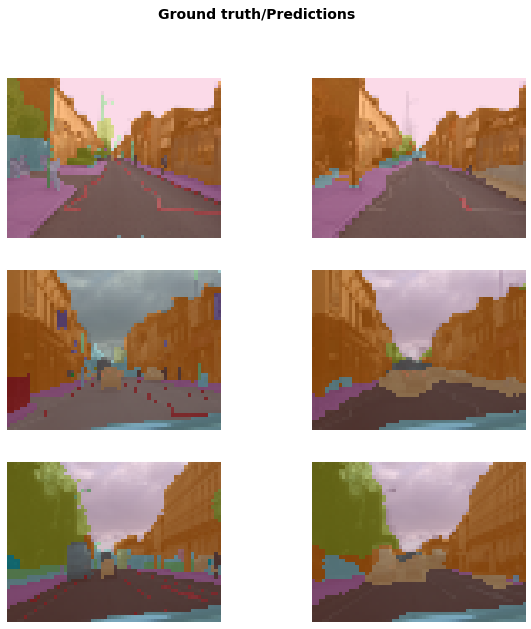

In [38]:
learn.show_results(rows=3, figsize=(10, 10))

In [1]:
#The accuracy raised by 1% so unfreezing before training helped to improve the model.
#for example the distinguishment between buildings and trees is better.
#The edges are not too clear though

In [40]:
#save model 2
learn.save('ExamTask2')

## Train on bigger images

In [43]:
learn.destroy()

size = (src_size // 1.5).astype(int)

free = gpu_mem_get_free_no_cache()
if free > 8200: 
  bs=3
else: 
  bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

this object has been destroyed
using bs=1, have 0MB of GPU RAM free


In [44]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [45]:
#I use here the same values as before
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


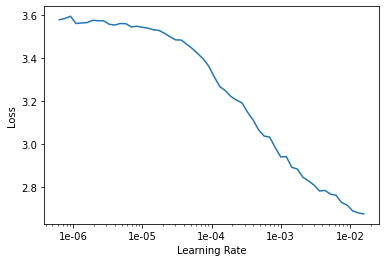

In [46]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
#learn.load('ExamTask2');

In [47]:
lr = 3e-3

In [48]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.510995,1.243233,0.665008,01:56
1,1.288083,1.158953,0.679640,01:52
2,1.205249,1.202871,0.677630,01:51
3,1.136140,1.016854,0.769523,01:52
4,1.109453,1.195348,0.662106,01:49
5,1.075842,1.071061,0.723833,01:53
6,1.031980,1.035757,0.776578,01:59
7,0.954435,0.884236,0.790130,01:48
8,0.926723,1.169377,0.715677,01:46
9,0.810511,0.777517,0.816867,02:02


In [49]:
#save model 1 with large images
learn.save('ExamTask1_large')

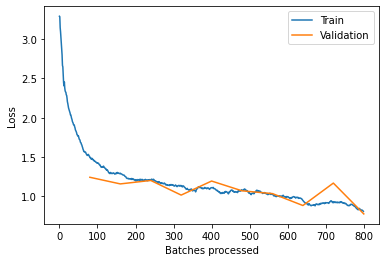

In [50]:
learn.recorder.plot_losses()

In [51]:
learn.unfreeze()

In [56]:
# we reached 83.4%
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.547757,0.715594,0.835224,02:41
1,0.544640,0.778863,0.824820,02:24
2,0.587306,0.846013,0.796020,02:27
3,0.648582,0.776095,0.823714,02:24
4,0.688798,0.827840,0.803607,02:18
5,0.720118,0.861239,0.805470,02:21
6,0.780149,0.982941,0.771742,02:27
7,0.769159,0.835747,0.803794,02:30
8,0.737552,0.836753,0.801996,02:29
9,0.637003,0.722759,0.834329,02:20


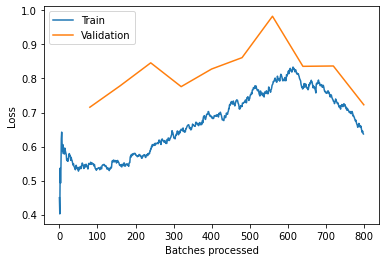

In [64]:
#smaller loss than previous one
learn.recorder.plot_losses()

In [57]:
#save model 2 with large images
learn.save('ExamTask2_large')

## Interpretation

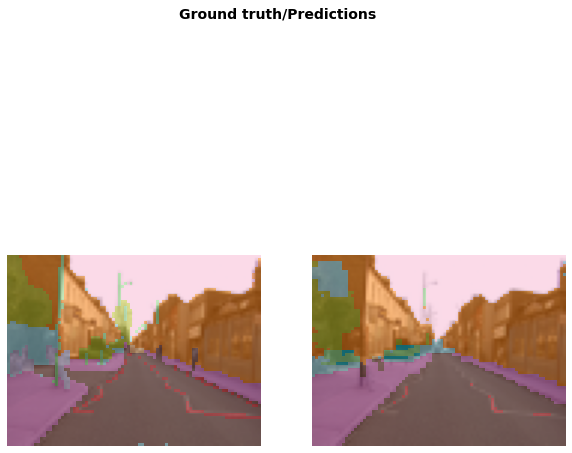

In [63]:
learn.show_results(rows=3, figsize=(10, 10))

More from the street is recognized as well as the borders of the buildings and most of the trees. The improvement is also really clear when you see the edges of the buildings with the sky and with te street. For further improvement more data is needed.